<a href="https://colab.research.google.com/github/julianrojas19/julianrojas19.github.io/blob/main/proyecto_8_true.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
df =pd.read_csv("/content/economicas.csv")
df

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,S,CC,COLOMBIA,M,18/03/1996,...,3.0,93,87,196,93,98,75.589753,4.0,4,PUBLICAR
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,S,CC,COLOMBIA,F,26/07/2000,...,3.0,80,69,192,90,97,75.346915,4.0,4,PUBLICAR
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,S,CC,COLOMBIA,F,30/01/1989,...,3.0,71,57,158,47,70,48.890151,2.0,2,PUBLICAR
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,S,CC,COLOMBIA,F,23/04/1998,...,1.0,14,9,117,6,15,43.091355,1.0,2,PUBLICAR


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_CONSECUTIVO                3855 non-null   object 
 1   RESULT_CODIGOPRUEBA             3855 non-null   int64  
 2   RESULT_NOMBREPRUEBA             3855 non-null   object 
 3   RESULT_PUNTAJE                  3855 non-null   int64  
 4   RESULT_DESEMPENO                3855 non-null   int64  
 5   ESTU_AGREGADO                   3855 non-null   object 
 6   ESTU_TIPODOCUMENTO              3855 non-null   object 
 7   ESTU_NACIONALIDAD               3855 non-null   object 
 8   ESTU_GENERO                     3855 non-null   object 
 9   ESTU_FECHANACIMIENTO            3855 non-null   object 
 10  ESTU_EXTERIOR                   3855 non-null   object 
 11  PERIODO                         3855 non-null   int64  
 12  ESTU_ESTUDIANTE                 38

In [75]:
X=df[['MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_COMUNI_ESCRITA_PUNT']]

In [76]:
X.isna().sum()

MOD_LECTURA_CRITICA_PUNT     0
MOD_COMPETEN_CIUDADA_PUNT    0
MOD_COMUNI_ESCRITA_PUNT      0
dtype: int64

In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   MOD_LECTURA_CRITICA_PUNT   3855 non-null   int64
 1   MOD_COMPETEN_CIUDADA_PUNT  3855 non-null   int64
 2   MOD_COMUNI_ESCRITA_PUNT    3855 non-null   int64
dtypes: int64(3)
memory usage: 90.5 KB


In [78]:
X = X.to_numpy()

In [79]:
y=df[['PUNT_GLOBAL']]

In [80]:
Y=y.to_numpy()

In [81]:
l = []
for i in X.T:
  u = i.mean()
  s = i.std()
  scal = (i - u) / s
  l.append(scal)

x_scal = np.array(l).T

In [82]:
cov_x = np.cov(x_scal.T)
cov_x

array([[1.00025947, 0.71551703, 0.354248  ],
       [0.71551703, 1.00025947, 0.32929953],
       [0.354248  , 0.32929953, 1.00025947]])

In [83]:
np.linalg.eig(pd.DataFrame(X).corr().to_numpy())

(array([1.95888733, 0.28410584, 0.75700683]),
 array([[-0.63477955, -0.71431923, -0.29462344],
        [-0.6280743 ,  0.69909307, -0.34174779],
        [-0.45008622,  0.0318891 ,  0.89241553]]))

In [84]:
val_p, vec_p = linalg.eig(cov_x)
val_p, vec_p

(array([1.9593956 +0.j, 0.28417956+0.j, 0.75720325+0.j]),
 array([[-0.63477955, -0.71431923, -0.29462344],
        [-0.6280743 ,  0.69909307, -0.34174779],
        [-0.45008622,  0.0318891 ,  0.89241553]]))

In [85]:
val_p = val_p[:2]
vec_p = vec_p[:, :2]

In [86]:
W = vec_p
pca_p = x_scal @ W
pca_p = pd.DataFrame(pca_p, columns=[f'PC{i}' for i in range(1, pca_p.shape[1] + 1)])
pca_p.head()

,PC1,PC2
0,-0.438899,0.725566
1,-3.100545,0.339631
2,3.611010,-0.186785
3,-0.249595,-0.319032
4,-0.076309,-0.224536


In [87]:
y=Y.T[0]
y@X

array([100870299, 100201580,  95172379])

In [88]:
y


array([201, 222,  88, ..., 158, 117, 147])

In [89]:
X

array([[151, 186, 159],
       [192, 206, 300],
       [109,  98,   0],
       ...,
       [155, 144, 159],
       [ 94,  89, 108],
       [157,  83,  90]])

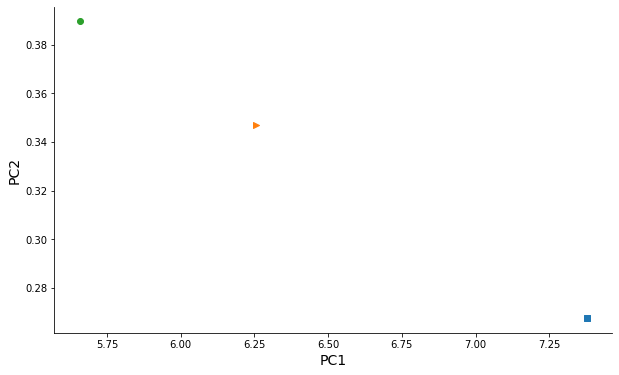

In [90]:
fig,ax = plt.subplots(1,1, figsize=(10,6))
markers = ['s','>','o']
for i,j in zip(np.unique(y), markers):
  ax.scatter(pca_p.iloc[:,0][y==i], pca_p.iloc[:,1][y==i], marker=j)

ax.set_xlabel(pca_p.columns[0], size=14)
ax.set_ylabel(pca_p.columns[1], size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [91]:
scal = StandardScaler()
X_scal = scal.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scal)

pca_2 = pd.DataFrame(X_pca, columns=['PC1','PC2'])

In [92]:
pca3 = PCA()

pca3.fit(X_scal)

PCA()

In [93]:
pca3.explained_variance_

array([1.9593956 , 0.75720325, 0.28417956])

In [94]:
pca3.explained_variance_ratio_

array([0.65296244, 0.25233561, 0.09470195])

In [95]:
np.cumsum(pca3.explained_variance_ratio_)

array([0.65296244, 0.90529805, 1.        ])

In [99]:
X.shape

(3855, 3)

In [100]:
y.shape

(3855,)

ValueError: ignored

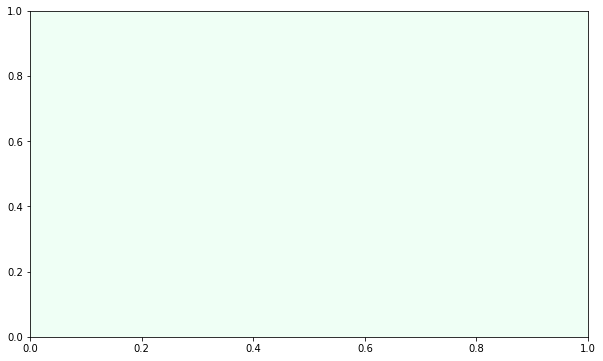

In [96]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.set_facecolor('#EFFFF5')
plt.plot(np.arange(1,5,1), pca3.explained_variance_ratio_, marker='s', label='varianza_explicada')
plt.plot(np.arange(1,5,1),np.cumsum(pca3.explained_variance_ratio_), marker='^', color='darkgreen', label='varianza_acumulada')
plt.Xlim(0.8,4.5)
plt.ylim(-0.05,1.05)
plt.Xticks(ticks=np.arange(1,5,1))
plt.axhline(1, ls='--', color='g', alpha=0.3)
plt.Xlabel('Número de componentes', size=14)
plt.ylabel('% varianza explicada', size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.grid(alpha=0.2, axis='both')
plt.show()

In [97]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


In [98]:
sklearn_loadings


array([[-0.88855433, -0.25637373],
       [-0.87916843, -0.29738013],
       [-0.63002354,  0.77655703]])

ValueError: ignored